# Network Traffic Analysis and Data Exploration

**Author:** Brian Macharia Njoki
**Registration Number:** CT206/109464/22 
**Course:** Bachelor of Science in Computer Security and Forensics  
**Institution:** Meru University of Science and Technology  
**Semester:** Fourth Year, First Semester  
**Date:** 09/10/2025

---

This notebook presents an exploratory data analysis (EDA) on a network intrusion dataset. The aim is to understand the structure of the data, clean it for accuracy, and visualize key features that may help identify patterns or potential anomalies in network behavior.

The dataset contains several network traffic attributes such as protocol type, packet count, byte transfer, and attack categories. Throughout this notebook, we:
- Load and inspect the dataset to understand its structure and characteristics.
- Perform basic data cleaning by handling missing values and removing irrelevant columns.
- Conduct descriptive analysis using statistical summaries.
- Visualize distributions of numerical variables and attack categories using **Matplotlib** and **Seaborn**.
  
By the end of this analysis, we aim to gain insight into how various features relate to each other and how attack categories are distributed across the dataset. This process serves as a foundational step in developing a reliable anomaly detection or intrusion detection model.


## Importing Essential Libraries
This section imports the core Python libraries needed for data analysis and visualization:
- **pandas**: For data manipulation and analysis with DataFrame structures
- **matplotlib.pyplot**: For creating static, interactive visualizations
- **seaborn**: Built on matplotlib, provides high-level interface for statistical graphics

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset
This cell loads the UNSW-NB15 network traffic dataset from a CSV file into a pandas DataFrame. This dataset is commonly used for network intrusion detection research and contains various features related to network traffic flows.

In [4]:
data = pd.read_csv('UNSW_NB15_training-set.csv')

## Initial Data Exploration
Displaying the entire dataset to get a first look at the structure, size, and content of the data. This helps understand the scale of the dataset and the types of features available.

In [5]:
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


## Examining Column Names
Displaying all column names to understand the features available in the dataset. This helps in identifying which features might be relevant for analysis and which ones might need preprocessing.

In [6]:
data.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

## Previewing First Few Rows
Displaying the first 5 rows of the dataset to get a quick overview of the data structure, values, and format. This helps in understanding the data types and identifying any immediate data quality issues.

In [7]:
data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


## Statistical Summary
Generating descriptive statistics for the numerical columns in the dataset. This includes count, mean, standard deviation, min/max values, and quartiles. This helps identify data distribution, outliers, and potential data quality issues.

In [8]:
data.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


## Feature Selection - Identifying Columns to Drop
Creating a list of column names that will be removed from the dataset. These columns are likely either:
- Identifiers (like 'id') that don't provide predictive value
- Features with high missing values
- Redundant or highly correlated features
- Features that won't contribute to the analysis

In [9]:
columns_to_drop = ['id', 'tcprtt','synack','ackdat','sloss', 'dloss','trans_depth','response_body_len']

## Data Cleaning - Removing Unnecessary Columns
Executing the removal of specified columns from the dataset. This step reduces dimensionality, removes noise, and focuses the analysis on the most relevant features for network traffic classification.

In [10]:
data = data.drop(columns=columns_to_drop)

## Verifying Drop Operation
Checking the drop method reference to ensure the operation was performed correctly. This is a quick verification step to confirm the method exists and was applied.

In [11]:
data.drop

<bound method DataFrame.drop of             dur proto service state  spkts  dpkts  sbytes  dbytes  \
0      0.000011   udp       -   INT      2      0     496       0   
1      0.000008   udp       -   INT      2      0    1762       0   
2      0.000005   udp       -   INT      2      0    1068       0   
3      0.000006   udp       -   INT      2      0     900       0   
4      0.000010   udp       -   INT      2      0    2126       0   
...         ...   ...     ...   ...    ...    ...     ...     ...   
82327  0.000005   udp       -   INT      2      0     104       0   
82328  1.106101   tcp       -   FIN     20      8   18062     354   
82329  0.000000   arp       -   INT      1      0      46       0   
82330  0.000000   arp       -   INT      1      0      46       0   
82331  0.000009   udp       -   INT      2      0     104       0   

                rate  sttl  ...  ct_dst_sport_ltm  ct_dst_src_ltm  \
0       90909.090200   254  ...                 1               2   
1

## Post-Cleaning Data Preview
Displaying the first 5 rows again after removing unnecessary columns to verify the cleaning operation was successful and to see the updated dataset structure.

In [12]:
data.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,...,1,3,0,0,0,2,3,0,Normal,0


## Dataset Dimensions Check
Checking the shape of the dataset after cleaning to confirm the number of rows and columns. This helps verify that the column removal was executed correctly and gives the current dataset size.

In [13]:
data.shape

(82332, 37)

## Updated Statistical Summary
Generating descriptive statistics again after data cleaning to see how the removal of columns affected the dataset. This provides an updated view of the data distribution for the remaining features.

In [14]:
data.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,6.305470e+05,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,2.393001e+06,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,2.112951e+03,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,1.585808e+04,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,2.082111e+07,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


## Data Types and Memory Usage
Displaying comprehensive information about the dataset including:
- Column names and data types
- Non-null counts to identify missing values
- Memory usage
This helps in understanding the data structure and identifying potential data type issues.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dur               82332 non-null  float64
 1   proto             82332 non-null  object 
 2   service           82332 non-null  object 
 3   state             82332 non-null  object 
 4   spkts             82332 non-null  int64  
 5   dpkts             82332 non-null  int64  
 6   sbytes            82332 non-null  int64  
 7   dbytes            82332 non-null  int64  
 8   rate              82332 non-null  float64
 9   sttl              82332 non-null  int64  
 10  dttl              82332 non-null  int64  
 11  sload             82332 non-null  float64
 12  dload             82332 non-null  float64
 13  sinpkt            82332 non-null  float64
 14  dinpkt            82332 non-null  float64
 15  sjit              82332 non-null  float64
 16  djit              82332 non-null  float6

## Setting Visualization Style
Configuring seaborn to use a white grid background for all subsequent plots. This ensures consistent and professional-looking visualizations throughout the analysis.

In [16]:
sns.set(style="whitegrid")

## Identifying Numerical Columns
Creating a list of all numerical column names in the dataset. This is useful for:
- Statistical analysis
- Correlation calculations
- Numerical feature visualization
- Machine learning preprocessing

In [17]:
numeric_cols = data.select_dtypes(include=['number']).columns.tolist()

## Distribution Analysis - First Numerical Feature
Creating a histogram with kernel density estimate (KDE) for the first numerical column in the dataset. This visualization helps understand:
- Data distribution shape
- Presence of outliers
- Central tendency and spread
- Data normality

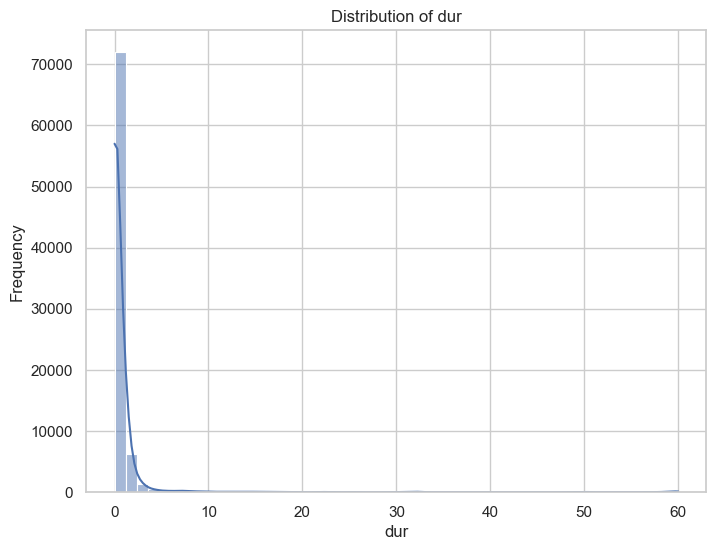

In [18]:
plt.figure(figsize=(8,6))
sns.histplot(data=data, x=numeric_cols[0], kde=True, bins=50)
plt.title(f'Distribution of {numeric_cols[0]}')
plt.xlabel(numeric_cols[0])
plt.ylabel('Frequency')
plt.show()

## Correlation Analysis
Creating a correlation heatmap to visualize relationships between all numerical features. This helps identify:
- Highly correlated features (potential redundancy)
- Features strongly related to the target variable
- Multicollinearity issues
- Feature importance for modeling

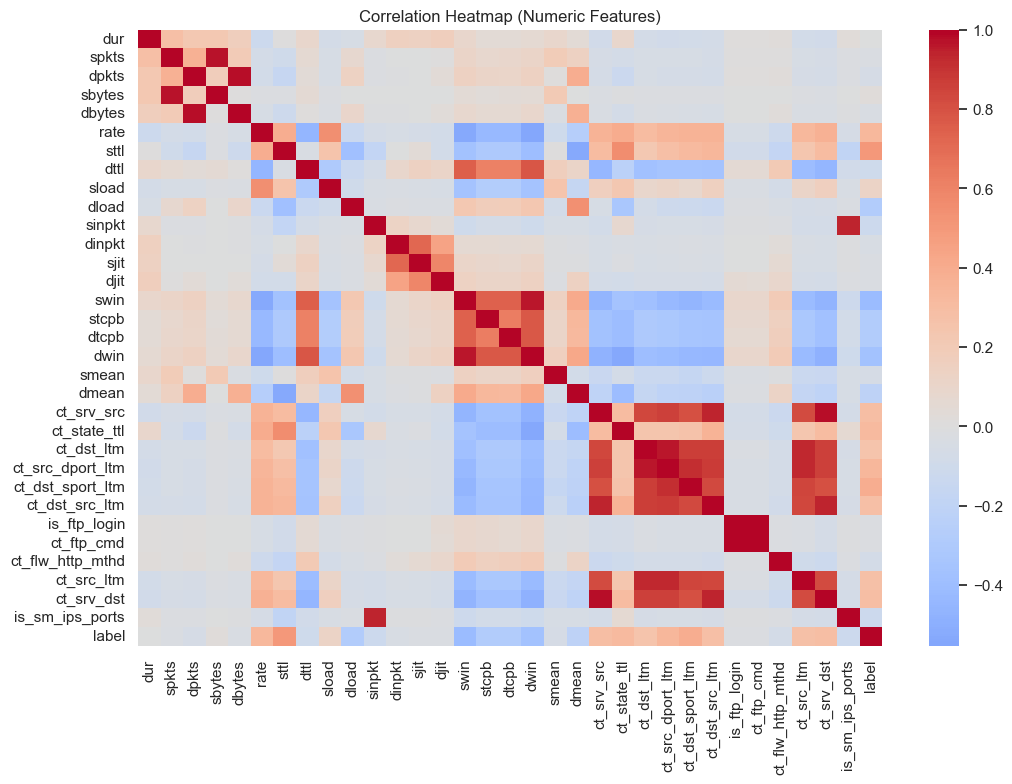

In [19]:
plt.figure(figsize=(12,8))
corr = data.select_dtypes(include=['number']).corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()

## Attack Category Distribution
Creating a count plot to visualize the frequency distribution of different attack categories in the dataset. This helps understand:
- Class imbalance issues
- Most common attack types
- Data distribution across categories
- Potential need for sampling strategies

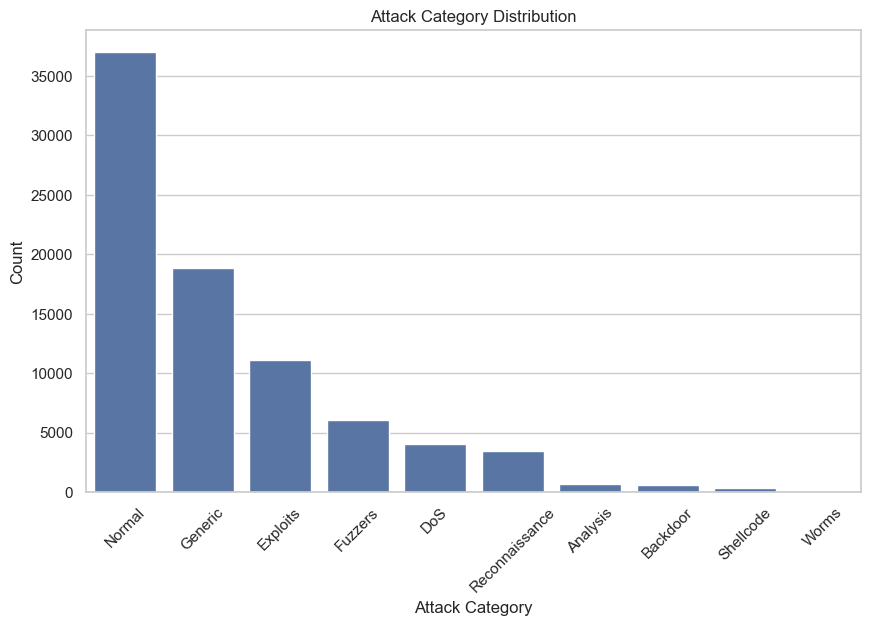

In [20]:
plt.figure(figsize=(10,6))
order = data['attack_cat'].value_counts().index
sns.countplot(data=data, x='attack_cat', order=order)
plt.xticks(rotation=45)
plt.title('Attack Category Distribution')
plt.xlabel('Attack Category')
plt.ylabel('Count')
plt.show()

# Conclusion

This notebook successfully demonstrated the process of loading, cleaning, describing, and visualizing a network intrusion dataset. Through descriptive statistics and visual exploration, we were able to identify key trends and gain a clearer understanding of the data distribution.

The visualization of the `attack_cat` variable provided a snapshot of how different types of attacks are represented, offering valuable insights for further feature engineering and model development. Meanwhile, the histograms of numerical features revealed patterns that could guide future analysis in detecting anomalies or classifying network traffic.